In [16]:
import pandas as pd
import os
%matplotlib inline

#List of all pickle files
pklfiles = [f for f in os.listdir('processed') if os.path.isfile(os.path.join('processed', f)) and f.endswith('.pkl')]
print(pklfiles)

['ad-chega.pkl', 'ad-ps.pkl']


In [2]:
video = 'ad-chega'
data = pd.read_pickle(os.path.join('processed', video + '.pkl'))

#Print first lines
data.head()

,filename,detections,poses,faces,text,embedding,fer
0,img00116.jpeg,"[[0, 53, 620, 659, person, 0.93359375], [612, ...","[[[0.6981924772262573, 0.41902482509613037, -0...","[[[0.6962661743164062, 0.477009117603302, -0.0...","[3, {2624, MONTYISGRO, O1:02, OO:OO, vÊNPBRA]","[1, 2, 1, 0, 254, 253, 254, 255, 4, 12, 253, 1...","[{'location': [773, 1055, 129, 412], 'embeddin..."
1,img01657.jpeg,"[[87, 45, 740, 587, person, 0.94140625], [1069...","[[[0.4402078092098236, 0.4400981664657593, -0....","[[[0.4418838918209076, 0.499070942401886, -0.0...","[=3, 9, [2624, MONHYIEGRO, 13.20, 13.05, vÊNPB...","[0, 253, 253, 253, 254, 253, 1, 255, 0, 18, 25...","[{'location': [344, 655, 133, 445], 'embedding..."
2,img00589.jpeg,"[[625, 31, 646, 686, person, 0.9375], [7, 38, ...","[[[0.28483036160469055, 0.3542748689651489, -0...","[[[0.6996282339096069, 0.436468243598938, -0.0...","[3, 82624, MONHYIEGRO, 03.48, 03.58, vÊNPBIA, 9]","[253, 1, 0, 255, 254, 253, 255, 255, 4, 7, 254...","[{'location': [166, 459, 91, 384], 'embedding'..."
3,img00264.jpeg,"[[604, 101, 111, 133, person, 0.80078125], [15...","[[[0.7193284034729004, 0.27134227752685547, -0...",[],"[23, 9, MONHYÍEGRO, 02.56, OO:OO, vÊNPBRA]","[253, 254, 4, 254, 2, 253, 1, 253, 1, 2, 0, 1,...","[{'location': [1120, 1188, 507, 576], 'embeddi..."
4,img00070.jpeg,"[[91, 29, 767, 660, person, 0.9375], [1051, 48...","[[[0.480089008808136, 0.362809419631958, -0.58...","[[[0.47768157720565796, 0.4398738145828247, -0...","[=3, 9, {2624, MONTYIEGRO, 00:16, OO:OO, vÊNPB...","[0, 0, 0, 0, 254, 253, 1, 255, 5, 18, 0, 9, 3,...","[{'location': [404, 688, 105, 389], 'embedding..."


In [3]:
data.iloc[0]

filename                                          img00116.jpeg
detections    [[0, 53, 620, 659, person, 0.93359375], [612, ...
poses         [[[0.6981924772262573, 0.41902482509613037, -0...
faces         [[[0.6962661743164062, 0.477009117603302, -0.0...
text              [3, {2624, MONTYISGRO, O1:02, OO:OO, vÊNPBRA]
embedding     [1, 2, 1, 0, 254, 253, 254, 255, 4, 12, 253, 1...
fer           [{'location': [773, 1055, 129, 412], 'embeddin...
Name: 0, dtype: object

In [30]:
import numpy as np
import matplotlib.pyplot as plt


# Image dimensions (width and height)
image_width = 1280
image_height = 720

# Initialize a 2D histogram with the dimensions of the image
heatmap = np.zeros((image_height, image_width))

In [31]:

# Function to extract keypoints from the poses list
def extract_and_accumulate_keypoints(poses, heatmap):
    for pose in poses:
        pose = np.array(pose)
        if pose.shape[1] >= 5:  # Ensure there are at least 5 values per keypoint
            x = np.floor(pose[:, 0] * image_width).astype(int)
            y = np.floor(pose[:, 1] * image_height).astype(int)
            visibility = pose[:, 3]
            presence = pose[:, 4]

            for i in range(pose.shape[0]):
                if visibility[i] > 0.5 and presence[i] > 0.5:
                    if 0 <= x[i] < image_width and 0 <= y[i] < image_height:
                        heatmap[y[i], x[i]] += 1

# Iterate over all frames and accumulate keypoints
for index, row in data.iterrows():
    extract_and_accumulate_keypoints(row['poses'], heatmap)

In [34]:

# Print some details about the heatmap
print(f"Heatmap shape: {heatmap.shape}")
print(f"Heatmap max value: {heatmap.max()}")
print(f"Heatmap min value: {heatmap.min()}")


Heatmap shape: (720, 1280)
Heatmap max value: 8.0
Heatmap min value: 0.0


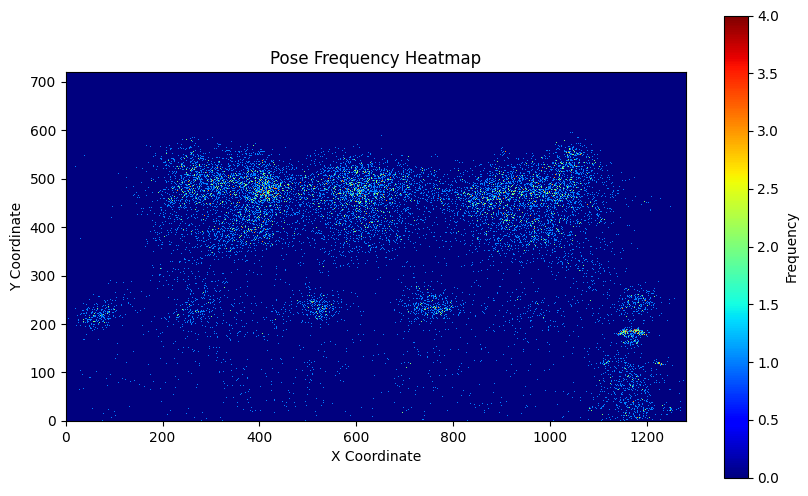

In [37]:


# Plot the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(heatmap, extent=[0, image_width, 0, image_height], cmap='jet', interpolation='nearest', vmax=4)
plt.colorbar(label='Frequency')
plt.title('Pose Frequency Heatmap')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

plt.show()
